# Polynomial Regression

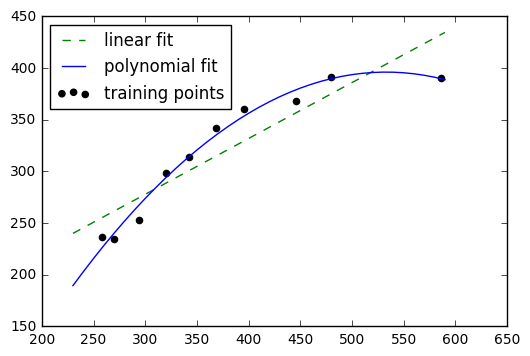

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# take input X,y
X = np.array([258.0, 270.0, 294.0,
                      320.0, 342.0, 368.0,
                         396.0, 446.0, 480.0,
                          586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])
X = X.reshape(10,-1)
y = y.reshape(10,-1)

# initialize lr and pr for linear and polynomial regression respectively
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# train lr and pr
lr.fit(X,y)
pr.fit(X_quad, y)

# give random test data and predict with lr & pr
X_fit = np.arange(230, 600, 10)
X_fit = X_fit.reshape(X_fit.shape[0], -1)
y_fit = lr.predict(X_fit)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plt the results to compare
plt.scatter(X,y, color='black', marker='o', label='training points')
plt.plot(X_fit, y_fit, linestyle='--', color='green', label='linear fit')
plt.plot(X_fit, y_quad_fit, color='blue', label='polynomial fit')
plt.legend(loc='best')
plt.show()

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training  R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training  R^2 linear: 0.832, quadratic: 0.982


# Analysis:
The MSE decreased from 570 (linear fit) to 61 (quadratic fit), and the coefficient of determination reflects a closer fit to the quadratic model with R^2 for linear = 0.832 vs R^2 for quadratic = 0.982 

# Modeling nonlinear relationships in the Housing Dataset


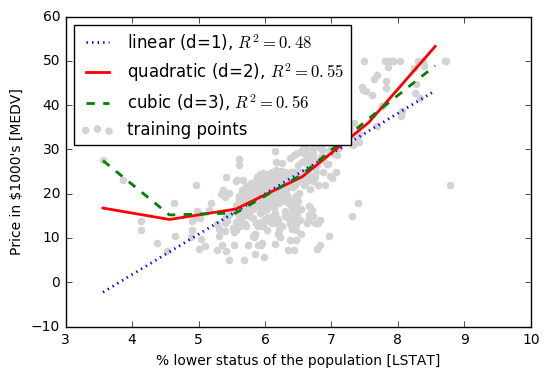

In [41]:
# Load housing data
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 
             'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X = df[['RM']].values
X = X.reshape(X.shape[0], -1)
y = df['MEDV'].values
y = y.reshape(y.shape[0], -1)

regr = LinearRegression()

# create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# linear fit
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, 
            label='training points', 
            color='lightgray')
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' 
         % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')
plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='best')
plt.show()

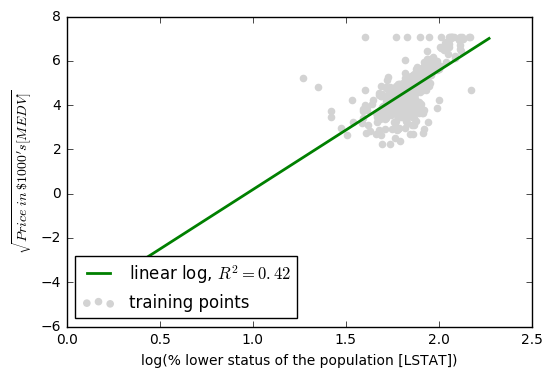

In [20]:
# log fit
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
regr = regr.fit(X_log, y_sqrt)
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
y_log_fit = regr.predict(X_fit)
log_r2 = r2_score(y_sqrt, regr.predict(X_log))


plt.scatter(X_log, y_sqrt, 
            label='training points', 
            color='lightgray')

plt.plot(X_fit, y_log_fit, 
         label='linear log, $R^2=%.2f$' % log_r2,
         color='green', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='best')
plt.show()

# Dealing with nonlinear relationships using random forests
<h3>DECISION TREE REGRESSION</h3>
An advantage of the decision tree algorithm is that it does not require any transformation of the features if we are dealing with nonlinear data. When we used decision trees for classification, we defined entropy as a measure of impurity to determine which feature split maximizes the Information Gain (IG) , or in other words, we want to find the feature split that reduces the impurities in the child nodes. To use a decision tree for regression, we will replace entropy as the impurity measure of a node Decision tree regression by the MSE

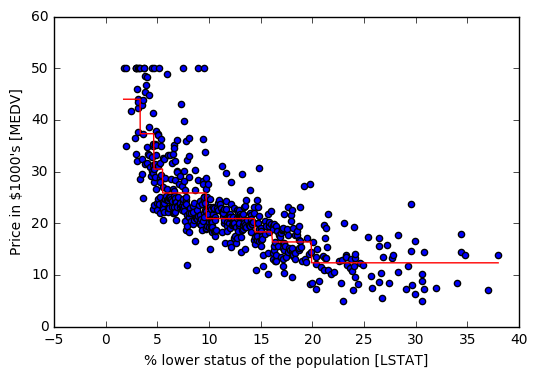

In [28]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
X = X.reshape(X.shape[0], -1)
y = y.reshape(y.shape[0], -1)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return None

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

# Analysis:
As we can see from the resulting plot, the decision tree captures the general trend in the data. However, a limitation of this model is that it does not capture the continuity and differentiability of the desired prediction. In addition, we need to be careful about choosing an appropriate value for the depth of the tree to not overfit or underfit the data; here, a depth of 3 seems to be a good choice

<html>
<h3> RANDOM FOREST REGRESSION </h3>
<li> A random forest usually has a better generalization performance than an individual decision tree due to randomness that helps to decrease the model variance. 
<li>Other advantages of random forests are that they are less sensitive to outliers in the dataset and don't require much parameter tuning.
<li> The only parameter in random forests that we typically need to experiment with is the number of trees in the ensemble. 
<li>The basic random forests algorithm for regression is almost identical to the random forest algorithm for classification. The only difference is that we use the MSE criterion to grow the individual decision trees, and the predicted target variable is calculated as the average prediction over all decision trees.
<li>Now, let's use all the features in the Housing Dataset to fit a random forest regression model on 60 percent of the samples and evaluate its performance on the remaining 40 percent. The code is as follows: 
</html>

In [31]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


# Analysis:
Unfortunately, we see that the random forest tends to overfit the training data. However, it's still able to explain the relationship between the target and explanatory variables relatively well (R^2=0.979)

# Lastly, let's also take a look at the residuals of the prediction

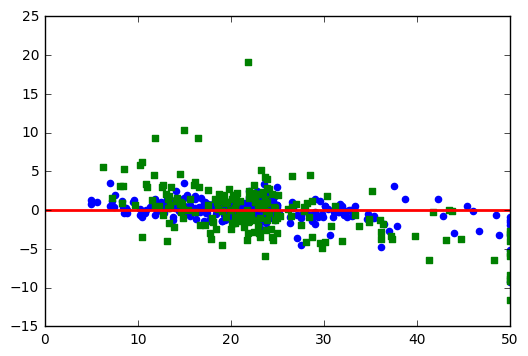

In [38]:
plt.scatter(y_train, y_train_pred-y_train, label='TrainingData', color='blue', marker='o')
plt.scatter(y_test, y_test_pred-y_test, label='TestingData', color='green', marker='s')
plt.hlines(xmin=0, xmax=50, y=0, color='red', lw=2)
plt.xlim(0,50)
plt.show()

# Analysis:
As already summarized by R^2 score, we can see that the model fits the training data better than the test data, as indicated by the outliers in the y axis direction. Also, the distribution of the residuals does not seem to be completely random around the zero center point, indicating that the model is not able to capture all the exploratory information. However, the residual plot indicates a large improvement over the residual plot of the linear model that we plotted earlier :

# Note
we also discussed the kernel trick that can be used in combination with support vector machine (SVM) for classification, which is useful if we are dealing with nonlinear problems. Although a discussion is beyond of the scope of this book, SVMs can also be used in nonlinear regression tasks. An SVM regressor is also implemented in scikit-learn, and more information about its usage can be found at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR.

In [ ]:
Q&A:
    - what does this do: sort_idx = X.flatten().argsort(). If we plot X,predict(X), graph is looking wierd.
        - "However, a limitation of this model is that it does not capture the continuity and differentiability of the desired prediction." line from analysis!?
        